# 乱炖“简书交友”数据之结构化数据
上一篇文章[乱炖数据之2700余篇“简书交友”专题文章数据的花式玩法](https://zhuanlan.zhihu.com/p/37618589)发布后，不少人想学习下代码，由于此前不曾在GitHub上开源过，流程还不熟悉，再者本项目中很多尝试性的代码，异常杂乱，因而没有立马公开。在经过删减和整理后，将继续更新出来。

本文主要涉及一些结构化数据的分析，文本数据如词频统计、词云图等等。本 notebook 暂且跳过爬虫部分。  代码见于 [**GitHub - DesertsX / JianShuJiaoYou**](https://github.com/DesertsX/JianShuJiaoYou)，后续LDA主题模型、word2vec词向量、文章照片爬取、人脸识别及颜值打分和照片墙等等更新后也会开源在此项目，欢迎star与指正。

另外先预告下，之后打算开个**“Kaggle Kernel 学习系列”**，[GitHub - DesertsX / Kaggle-Kernel-Learning](https://github.com/DesertsX/Kaggle-Kernel-Learning)，主要是翻译和学习下kaggle上优秀的kernels。其中第一篇非常粗糙，还没润色、修改排版布局的notebook可供浏览下，也欢迎关注、star和提供宝贵建议：  
https://desertsx.github.io/2018/06/09/1_1_Start_Here-A_Gentle_Introduction/     
https://desertsx.github.io/2018/06/09/kaggle-Kernel-01/


## 文章配图数

In [1]:
import pandas as pd
df12 = pd.read_csv('JianShuJiaoYou-All-Data.csv', encoding='utf-8')
df12.head(2)

Page  Num    Author                              Author_Url  \
0     1    0       刘秀玲  https://www.jianshu.com/u/470f33ea0c92   
1     1    1  道长是名思维贩子  https://www.jianshu.com/u/92eb338437ee   

                    Title                       Time    Read  Comment  Like  \
0                 我要嫁这样的你  2016-07-25T12:16:39+08:00  109763     4508  5333   
1  如果你喜欢一个人，说些什么话让对方也喜欢你呢  2017-10-29T11:42:34+08:00   69260      497  3693   

                                            Abstract  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...   
1                                                NaN   

                              Artical_Url  \
0  https://www.jianshu.com/p/8de3d395734f   
1  https://www.jianshu.com/p/373d67f7cbce   

                                           Image_Url  \
0  ['//upload-images.jianshu.io/upload_images/125...   
1  ['//upload-images.jianshu.io/upload_images/299...   

                                     Artical_Content  
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...  
1                                       你现在有没有喜欢一个人？

新增`Images_Num`一列记录每篇文章配图数，但发现数字异常，`Image_Url`中的每一元素是字符串而非列表。

In [2]:
def images_num(imageslist):
    return len(imageslist)
df12['Images_Num'] = df12.Image_Url.apply(images_num)
df12.head(1)

Page  Num Author                              Author_Url    Title  \
0     1    0    刘秀玲  https://www.jianshu.com/u/470f33ea0c92  我要嫁这样的你   

                        Time    Read  Comment  Like  \
0  2016-07-25T12:16:39+08:00  109763     4508  5333   

                                            Abstract  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...   

                              Artical_Url  \
0  https://www.jianshu.com/p/8de3d395734f   

                                           Image_Url  \
0  ['//upload-images.jianshu.io/upload_images/125...   

                                     Artical_Content  Images_Num  
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...         292

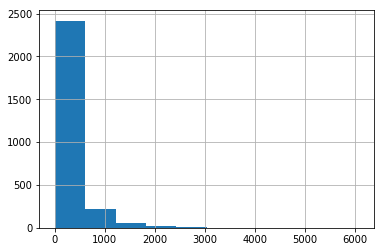

In [4]:
df12.Images_Num.hist();

### 将字符串转化成 list 格式
`eval()函数`：可以将 list, tuple, dict 与 string 相互转化  

**实例：**

In [5]:
a = "[[1,2], [3,4], [5,6], [7,8], [9,0]]"
print(a)
print(type(a))
b = eval(a)
print(b)
print(type(b))

[[1,2], [3,4], [5,6], [7,8], [9,0]]
<class 'str'>
[[1, 2], [3, 4], [5, 6], [7, 8], [9, 0]]
<class 'list'>


**统计每篇文章配图数的正确方式**

In [6]:
def images_num(imageslist):
    return len(eval(imageslist))
df12['Images_Num'] = df12.Image_Url.apply(images_num)
df12.head(1)

Page  Num Author                              Author_Url    Title  \
0     1    0    刘秀玲  https://www.jianshu.com/u/470f33ea0c92  我要嫁这样的你   

                        Time    Read  Comment  Like  \
0  2016-07-25T12:16:39+08:00  109763     4508  5333   

                                            Abstract  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...   

                              Artical_Url  \
0  https://www.jianshu.com/p/8de3d395734f   

                                           Image_Url  \
0  ['//upload-images.jianshu.io/upload_images/125...   

                                     Artical_Content  Images_Num  
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...           4

**分布情况**

In [7]:
df12.Images_Num.value_counts()

1     728
0     438
2     367
3     291
4     178
5     131
6     128
7      80
8      75
9      61
11     43
10     35
12     26
13     17
15     15
14     13
19     12
21     10
17      9
18      8
16      8
20      7
25      5
26      5
28      3
24      3
41      2
27      2
32      2
30      2
22      2
23      2
81      1
38      1
44      1
56      1
77      1
88      1
35      1
51      1
55      1
62      1
Name: Images_Num, dtype: int64

**直方图**  
分布情况一目了然，文章配图数最多的高达80+

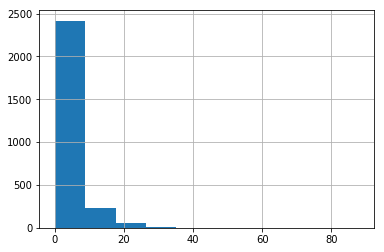

In [8]:
df12.Images_Num.hist();

## 文章长度 / 字数
粗略统计下每篇文章的长度

In [9]:
def artical_length(artical_content):
    return len(artical_content)
df12['Artical_Length'] = df12.Artical_Content.apply(artical_length)
df12.head(1)

Page  Num Author                              Author_Url    Title  \
0     1    0    刘秀玲  https://www.jianshu.com/u/470f33ea0c92  我要嫁这样的你   

                        Time    Read  Comment  Like  \
0  2016-07-25T12:16:39+08:00  109763     4508  5333   

                                            Abstract  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...   

                              Artical_Url  \
0  https://www.jianshu.com/p/8de3d395734f   

                                           Image_Url  \
0  ['//upload-images.jianshu.io/upload_images/125...   

                                     Artical_Content  Images_Num  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...           4   

   Artical_Length  
0            1269

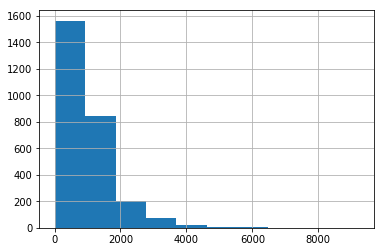

In [10]:
df12.Artical_Length.hist();

## 字数与配图数
看看文章篇幅和配图数之间是否存在某种关系。   
[seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html)

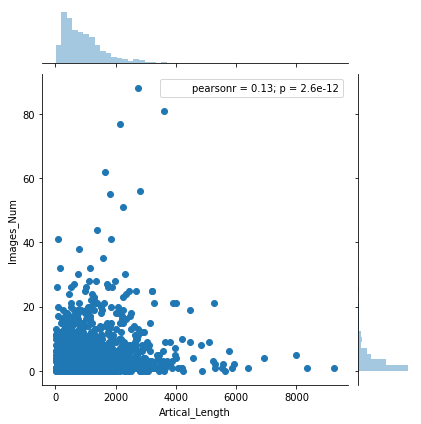

In [12]:
import seaborn as sns
sns.jointplot(x="Artical_Length" , y = "Images_Num" ,data = df12);

**改个参数看看**

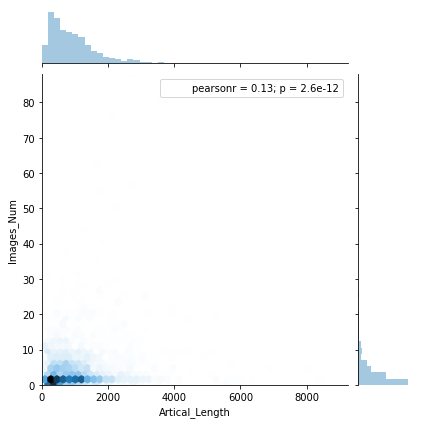

In [13]:
sns.jointplot(x="Artical_Length" , y = "Images_Num" ,data = df12, kind="hex");

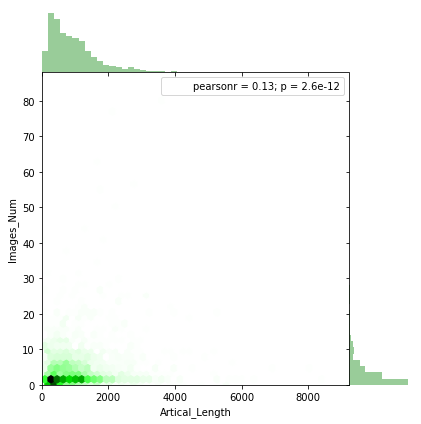

In [15]:
# http://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid
sns_joinplot = sns.jointplot(x="Artical_Length" , y = "Images_Num" ,data = df12, kind="hex", space=0, color="g");
sns_joinplot.savefig('Images/seaborn_ArticalLength_ImagesNum_joinplot.png')

In [ ]:
# import matplotlib.pyplot as plt
# plt.savefig('Images/seaborn_ArticalLength_ImagesNum_joinplot.png')

## 评论数与点赞数
由皮尔逊相关系数为0.58可知，评论数与点赞数有一定的线性相关性。

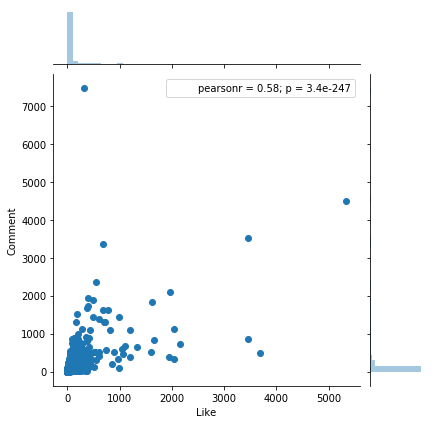

In [16]:
sns_joinplot = sns.jointplot(x="Like" , y = "Comment" ,data = df12);
sns_joinplot.savefig('Images/seaborn_Like_Comment_joinplot.png')

### 阅读量、评论数与点赞数
[通过聚类分析吃鸡亚洲，北美，欧洲前百名玩家的行为](https://zhuanlan.zhihu.com/p/30172493)   
[python3d画图mpl_toolkits.mplot3d](https://blog.csdn.net/chi_wawa/article/details/68062506)  
[Matplotlib 绘图教程(3D)](https://blog.csdn.net/dahunihao/article/details/77833877)  

Text(0.5,0,'Read')

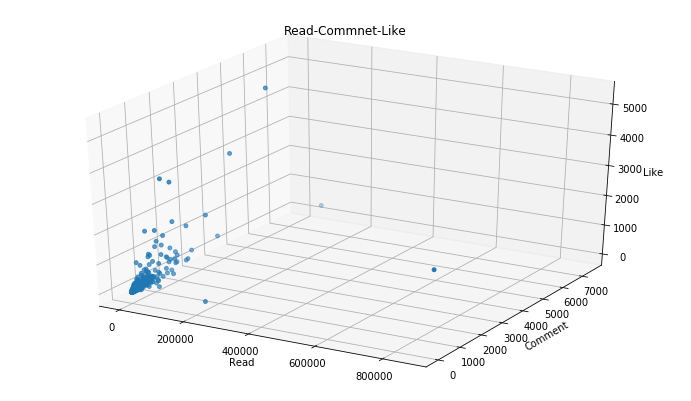

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 7))
ax1 = plt.subplot(111,projection='3d')
x,y,z = df12['Read'],df12['Comment'],df12['Like']
ax1.scatter(x, y, z, s=15)
ax1.set_title('Read-Commnet-Like')
ax1.set_zlabel('Like')
ax1.set_ylabel('Comment')
ax1.set_xlabel('Read')
#plt.show()

## 多变量
看看阅读量、评论数、点赞数、文章篇幅与配图数五个变量之间的相关关系。  
### Pairplot图
[seaborn.pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html)

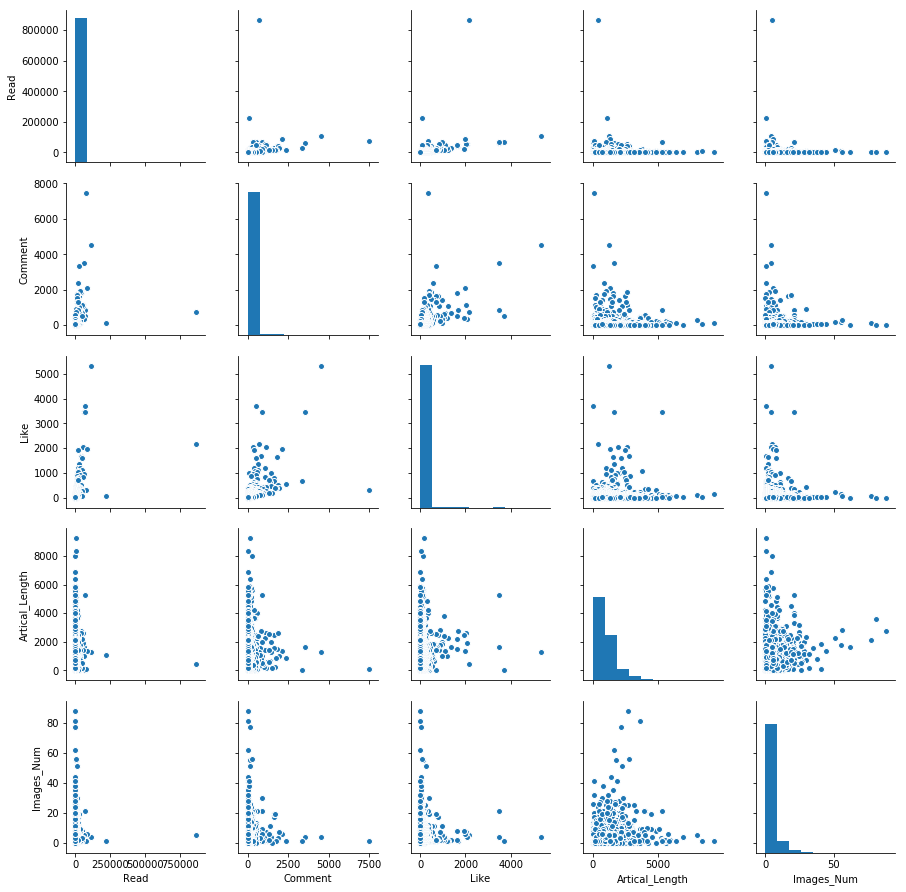

In [20]:
# Seaborn-05-Pairplot多变量图
# https://www.jianshu.com/p/6e18d21a4cad

import matplotlib.pyplot as plt
data = df12[["Read", "Comment", "Like", "Artical_Length","Images_Num"]]
#plt.figure(figsize=(6,4))
g = sns.pairplot(data, palette="husl");
g.savefig('Images/seaborn_pairplot.png');

### Heatmap图
[seaborn-heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

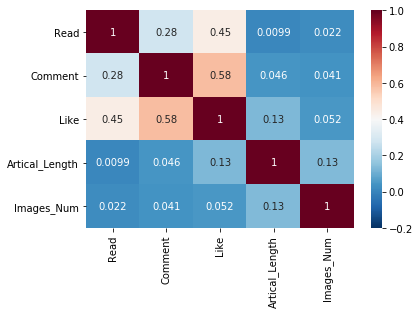

In [21]:
sns.heatmap(data=data.corr(), annot=True, linewidths=0, vmin=-0.2, cmap='RdBu_r');

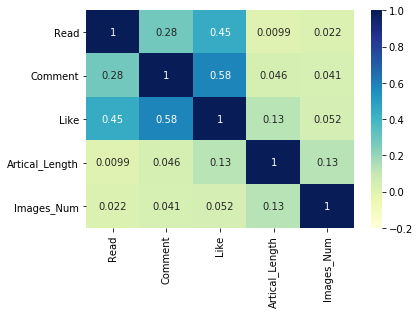

In [22]:
sns.heatmap( data=data.corr(), annot=True, linewidths=0, vmin=-0.2, cmap='YlGnBu');

## 文章发布时间
从`Time`列分别提取年份、月份、天、小时等等数据。

In [23]:
def split_time_ymd(timestamp):
    ymd = timestamp.split('T')[0]
    return ymd

def split_time_year(timestamp):
    ymd = timestamp.split('T')[0]
    year = ymd.split('-')[0]
    return year

def split_time_month(timestamp):
    ymd = timestamp.split('T')[0]
    month = ymd.split('-')[1]
    return month

def split_time_day(timestamp):
    ymd = timestamp.split('T')[0]
    day = ymd.split('-')[-1]
    return day

def split_time_hour(timestamp):
    timestamp = timestamp.split('T')[1]
    hour = timestamp[:2]
    return hour

df12['YMD'] = df12.Time.apply(split_time_ymd)
df12['Year'] = df12.Time.apply(split_time_year)
df12['Month'] = df12.Time.apply(split_time_month)
df12['Day'] = df12.Time.apply(split_time_day)
df12['Hour'] = df12.Time.apply(split_time_hour)
df12.head(2)

Page  Num    Author                              Author_Url  \
0     1    0       刘秀玲  https://www.jianshu.com/u/470f33ea0c92   
1     1    1  道长是名思维贩子  https://www.jianshu.com/u/92eb338437ee   

                    Title                       Time    Read  Comment  Like  \
0                 我要嫁这样的你  2016-07-25T12:16:39+08:00  109763     4508  5333   
1  如果你喜欢一个人，说些什么话让对方也喜欢你呢  2017-10-29T11:42:34+08:00   69260      497  3693   

                                            Abstract  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...   
1                                                NaN   

                              Artical_Url  \
0  https://www.jianshu.com/p/8de3d395734f   
1  https://www.jianshu.com/p/373d67f7cbce   

                                           Image_Url  \
0  ['//upload-images.jianshu.io/upload_images/125...   
1  ['//upload-images.jianshu.io/upload_images/299...   

                                     Artical_Content  Images_Num  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...           4   
1                                       你现在有没有喜欢一个人？           1   

   Artical_Length         YMD  Year Month Day Hour  
0            1269  2016-07-25  2016    07  25   12  
1              12  2017-10-29  2017    10  29   11

In [24]:
df12.to_csv("JianShuJiaoYou-order_by-All-SplitTime.csv", encoding='utf-8')

### 发文年份
可以和另一专题“今日看点”及一篇旧文里的数据比较：[简书=鸡汤？爬取简书今日看点：1916篇热门文章可视化](https://zhuanlan.zhihu.com/p/29118954)

In [25]:
df12.Year.value_counts()

2018    1992
2017     718
2016       6
2015       2
Name: Year, dtype: int64

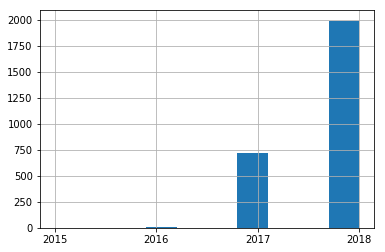

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
df12.Year.hist();

### 发文月份

In [27]:
df12.Month.value_counts()

04    644
03    471
05    444
02    251
11    237
08    205
01    188
12     93
10     93
09     82
07      8
06      2
Name: Month, dtype: int64

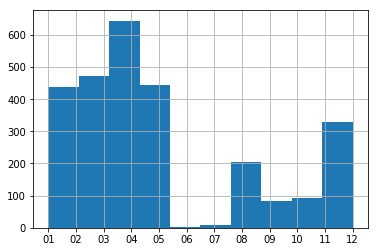

In [28]:
df12.Month.hist();

### 发文日期

In [29]:
df12.Day.value_counts()

03    119
22    117
08    112
23    112
04    108
02    106
19    106
06    104
18     99
20     97
13     97
05     95
11     93
12     92
07     92
01     90
17     85
10     83
09     81
14     81
27     77
16     76
25     74
21     74
24     71
15     68
29     68
26     64
30     64
28     62
31     51
Name: Day, dtype: int64

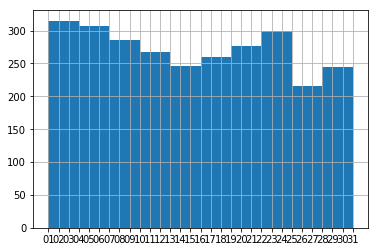

In [30]:
df12.Day.hist();

### 发文小时

In [31]:
df12.Hour.value_counts()

#00  132 01  53  02  35  03  13
#04  5   05  6   06  29  07  42  
#08  78  09  112 10  175
#11  151  12   113
#13  133  14  141
#15  164  16  181
#17  162  18  153
#19  150  20  147
#21  162  22  201 23  180

22    201
16    181
23    180
10    175
15    164
21    162
17    162
18    153
11    151
19    150
20    147
14    141
13    133
00    132
12    113
09    112
08     78
01     53
07     42
02     35
06     29
03     13
05      6
04      5
Name: Hour, dtype: int64

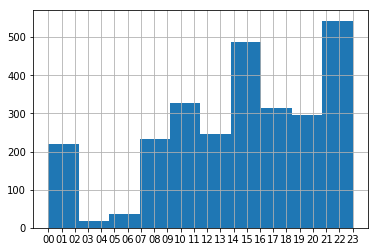

In [32]:
df12.Hour.hist();

### ECharts美颜一下：发文小时
上述绘制的发布时间的相关图表都不够美观，于是翻出压箱底的又一篇旧文：[图表太丑怎么破，ECharts神器带你飞！](https://zhuanlan.zhihu.com/p/29988515)

直接套用`ECharts`图表模板，改下数据和标题等参数就行了，代码参见：[简书交友”专题文章之24小时分布情](http://gallery.echartsjs.com/editor.html?c=xH1PEoD0e7&v=1)。   

更多图表见于：[ECharts3官网的个人主页](http://gallery.echartsjs.com/explore.html?u=bd-3190370387&type=work#sort=rank~timeframe=all~author=all)

<img src='Images/“简书交友”专题文章之24小时分布情况.png'>

### 年度月份分布情况

In [33]:
df12.groupby(['Year','Month']).Month.count()

Year  Month
2015  04         1
      09         1
2016  07         2
      08         1
      10         1
      12         2
2017  01         1
      02         3
      04         1
      06         2
      07         6
      08       204
      09        81
      10        92
      11       237
      12        91
2018  01       187
      02       248
      03       471
      04       642
      05       444
Name: Month, dtype: int64

###  ECharts美颜一下：年度月份
[图表太丑怎么破，ECharts神器带你飞！](https://zhuanlan.zhihu.com/p/29988515)  
[ECharts3官网的个人主页](http://gallery.echartsjs.com/explore.html?u=bd-3190370387&type=work#sort=rank~timeframe=all~author=all)  

将`echarts_bar_year_month.js`里代码复制到该链接后刷新即可：[“简书交友”专题文章之年度月份分布情况](http://echarts.baidu.com/echarts2/doc/example/bar14.html#macarons)
<img src='Images/“简书交友”专题文章之年度月份分布情况.png'>

# 文本挖掘
**相关旧文一篇：[2017，那些出现在日记中的人：简单的文本挖掘](https://zhuanlan.zhihu.com/p/32721694)**
## 读取数据

In [35]:
import warnings
warnings.filterwarnings("ignore")
import jieba
import numpy as np
import codecs
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud
# https://github.com/amueller/word_cloud/
# conda install -c conda-forge wordcloud

In [36]:
import pandas as pd
df12 = pd.read_csv("JianShuJiaoYou-order_by-All-SplitTime.csv", encoding='utf-8')
df12.head(2)

Unnamed: 0  Page  Num    Author                              Author_Url  \
0           0     1    0       刘秀玲  https://www.jianshu.com/u/470f33ea0c92   
1           1     1    1  道长是名思维贩子  https://www.jianshu.com/u/92eb338437ee   

                    Title                       Time    Read  Comment  Like  \
0                 我要嫁这样的你  2016-07-25T12:16:39+08:00  109763     4508  5333   
1  如果你喜欢一个人，说些什么话让对方也喜欢你呢  2017-10-29T11:42:34+08:00   69260      497  3693   

   ...                              Artical_Url  \
0  ...   https://www.jianshu.com/p/8de3d395734f   
1  ...   https://www.jianshu.com/p/373d67f7cbce   

                                           Image_Url  \
0  ['//upload-images.jianshu.io/upload_images/125...   
1  ['//upload-images.jianshu.io/upload_images/299...   

                                     Artical_Content Images_Num  \
0  你不用太高，比穿三五厘米跟鞋的我看起来不矮就行。我不是小鸟依人的型，累了或者想哭的时候，我愿...          4   
1                                       你现在有没有喜欢一个人？          1   

   Artical_Length         YMD  Year  Month  Day  Hour  
0            1269  2016-07-25  2016      7   25    12  
1              12  2017-10-29  2017     10   29    11  

[2 rows x 21 columns]

## 文章内容转化成 list 格式
这段情话还不错的样子，一定是个可爱漂亮的小姐姐写的吧，逃...

In [41]:
content = df12.Artical_Content.values.tolist()
print(len(content), '\n', content[-1])

2718 
 我攒了一被子的情话，想要说给你听最近有种很杂碎的感觉，嗯...如果用比喻修辞来说的话，就是已经很久都没有那种写完满满一张纸的感觉，没有看完整整一本书的感觉，没有跑完操场一圈，没有听完一整首歌，也没有睡满整整一夜。总感觉还是缺一点什么。但我有很走心的去想了，可能是因为缺了每一个可爱的你。“如果是去见你，我会跑着去”刚看到这句话的时候，我也很赞同，因为毕竟去见一个想见了很久的人的时候，怎么也按捺不住你你内心的欣喜。到后来，当你真正去见ta的时候，你没有跑，你依然故作镇定的样子，只是你会比平时都迈的步子大一点，你担心你跑起来的样子不那么美观，你担心就算是夏天的微风也还是会把你轻薄的刘海吹乱。你会在意每个细节，你每次都希望你在ta面前是最好的状态。嗨，如果要去见你的话，我不跑着去了，我只想以我最好的状态去见你你像是我被子里的舒服你像是我右手背上的那颗痣你像是我眼角微微泛出来的光你像是我全身每一寸肌肤在呼吸你像是我枕头里的枕芯棉你像是我买过最好看书里的一页你像是我踩着云就可以飞上天你像是我走过的所有路途最想停留的瞬间你是我在夜晚闭上眼最后想到的人你是我在清晨睁开眼最先念起的人你是我的一日三餐你是我的一年四季来不及了不想再浪费时间昨天，今天，明天我还是最喜欢你总有一个人的出现，让我像流沙，像落雪。那些别人在上面划了又划的痕迹，你轻轻一抹，就平了。攒了一被子的情话，以后慢慢数给你听。希望认识更多可爱的人，一起做喜欢的事，写最纯真的字，讲有趣的故事。我是礼雪晶，那么你呢？作者:礼雪晶。“真羡慕你们这么年轻就遇到了这么才华横溢的我。”一个整天与数字对抗却藏了一被子情话的95后女生。愿你的深情不被辜负，你喜欢的人也喜欢你。


## jieba 分词

In [42]:
segs = jieba.lcut(content[-1])
print(segs)
for seg in segs:
    if len(seg) > 1:
        print(seg)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 4.140 seconds.
Prefix dict has been built succesfully.


['我', '攒', '了', '一', '被子', '的', '情话', '，', '想要', '说', '给', '你', '听', '最近', '有种', '很', '杂碎', '的', '感觉', '，', '嗯', '...', '如果', '用', '比喻', '修辞', '来说', '的话', '，', '就是', '已经', '很久', '都', '没有', '那种', '写', '完', '满满', '一张', '纸', '的', '感觉', '，', '没有', '看', '完', '整整', '一', '本书', '的', '感觉', '，', '没有', '跑', '完', '操场', '一圈', '，', '没有', '听', '完一', '整首歌', '，', '也', '没有', '睡满', '整整', '一夜', '。', '总', '感觉', '还是', '缺', '一点', '什么', '。', '但', '我', '有', '很', '走心', '的', '去', '想', '了', '，', '可能', '是因为', '缺', '了', '每', '一个', '可爱', '的', '你', '。', '“', '如果', '是', '去', '见', '你', '，', '我会', '跑', '着', '去', '”', '刚', '看到', '这句', '话', '的', '时候', '，', '我', '也', '很', '赞同', '，', '因为', '毕竟', '去', '见', '一个', '想见', '了', '很', '久', '的', '人', '的', '时候', '，', '怎么', '也', '按捺不住', '你', '你', '内心', '的', '欣喜', '。', '到', '后来', '，', '当', '你', '真正', '去', '见', 'ta', '的', '时候', '，', '你', '没有', '跑', '，', '你', '依然', '故作', '镇定', '的', '样子', '，', '只是', '你', '会', '比', '平时', '都', '迈', '的', '步子', '大', '一点', '，', '你', '担心', '你', '跑', '起来', '的', 

In [43]:
segment = []
for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

### 载入停用词

In [44]:
words_df = pd.DataFrame({"segment": segment})
stopwords_df = pd.read_csv('Stopwords/Chinese_Stopwords.txt',index_col=False, quoting=3,sep="\t",names=['stopwords'], encoding='utf-8') #quoting=3全不引用
stopwords_df.head()

stopwords
0         $
1         0
2         1
3         2
4         3

### 去掉停用词

In [45]:
words_df = words_df[~words_df.segment.isin(stopwords_df.stopwords)]
words_df.head()

segment
0      不用
1      太高
2      比穿
3      三五
4      厘米

## 统计词频

In [46]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数": np.size})
words_stat = words_stat.reset_index().sort_values(by=["计数"], ascending=False)
words_stat.head(30)

segment    计数
19510      喜欢  9535
2574       一个  9314
41918      没有  4949
48850      知道  3571
3530       一起  3481
50805      简书  2948
46592      生活  2787
27192      希望  2735
57188      觉得  2636
38347      朋友  2621
46137      现在  2365
28984      很多  2363
4634       不会  2069
35718      文章  1981
3342       一直  1926
48521      真的  1697
36888      时间  1606
17484      可能  1567
48268      看到  1539
12231      其实  1505
35200      故事  1452
35642      文字  1448
26817      工作  1440
31077      感觉  1368
2901       一定  1326
27022      已经  1290
7464       事情  1283
31458      我会  1264
21945      大学  1231
5641       世界  1229

In [47]:
words_stat.to_csv("JianShuJiaoYou-Words_Segments.csv", encoding='utf-8')

## 文章内容词云
### 丑版

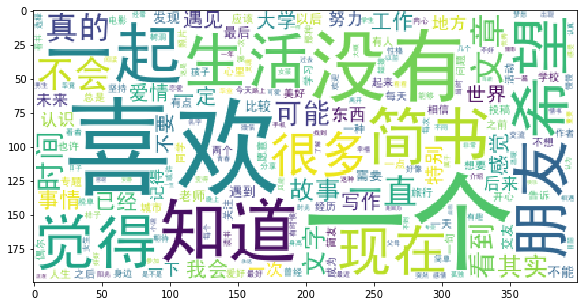

In [48]:
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white',max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud);
# plt.imsave(path)

### 自定义背景图 1.0版
简书交友专题 Logo
<img src='Images/Logo-1.jpg'>

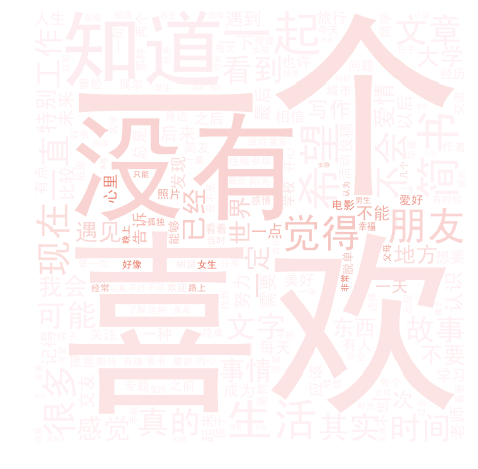

In [49]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('Images/Logo-1.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors));

### 自定义背景图 2.0版
中古民谣乐团Bloody Woods
<img src='Images/中古民谣乐团Bloody Woods.jpg'>

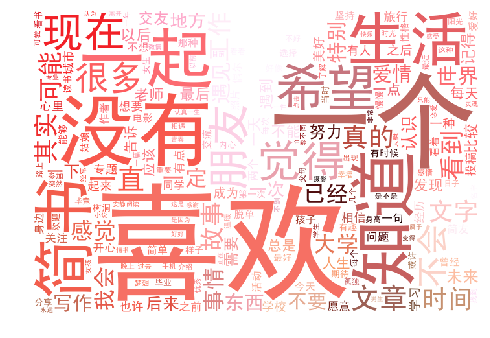

In [50]:
# wordcloud / word_frequence 还是应该取不同名
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('Images/中古民谣乐团Bloody Woods.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors));

**还是太丑**
### 在线词云生成网站：[HTML5 Word Cloud](https://timdream.org/wordcloud/)
[图表太丑怎么破，ECharts神器带你飞](https://www.jianshu.com/p/da1367b71985)  
[本次词云实例](https://timdream.org/wordcloud/#base64-list:OTUzNQnllpzmrKIKOTMxNAnkuIDkuKoKNDk0OQnmsqHmnIkKMzU3MQnnn6XpgZMKMzQ4MQnkuIDotbcKMjk0OAnnroDkuaYKMjc4NwnnlJ/mtLsKMjczNQnluIzmnJsKMjYzNgnop4nlvpcKMjYyMQnmnIvlj4sKMjM2NQnnjrDlnKgKMjM2MwnlvojlpJoKMjA2OQnkuI3kvJoKMTk4MQnmlofnq6AKMTkyNgnkuIDnm7QKMTY5NwnnnJ/nmoQKMTYwNgnml7bpl7QKMTU2Nwnlj6/og70KMTUzOQnnnIvliLAKMTUwNQnlhbblrp4KMTQ1MgnmlYXkuosKMTQ0OAnmloflrZcKMTQ0MAnlt6XkvZwKMTM2OAnmhJ/op4kKMTMyNgnkuIDlrpoKMTI5MAnlt7Lnu48KMTI4Mwnkuovmg4UKMTI2NAnmiJHkvJoKMTIzMQnlpKflraYKMTIyOQnkuJbnlYwKMTIyMgnpgYfop4EKMTE4OQnnibnliKsKMTE2NgnniLHmg4UKMTE1NQnkuI3opoEKMTE1MQnlhpnkvZwKMTEyMgnkuJzopb8KMTEwMwnlnLDmlrkKMTA5NgnkuIDmrKEKMTA4MgnorqTor4YKMTA2MgnlkI7mnaUKMTA2MAnliqrlipsKMTA1MQnkuIDkuIsKMTAzMwnmnKrmnaUKMTAyNQnorrDlvpcKMTAyNAnmnIDlkI4KMTAwMwnkuqTlj4sKMTAwMAnpgYfliLAKOTc5CeavlOi+gwo5NzIJ5Lul5ZCOCjk2NAnpnIDopoEKOTYzCeS4jeiDvQo5NDYJ6ICB5biICjkzOAnlj5HnjrAKOTM1CeS4gOWkqQo5MjgJ5q+P5aSpCjkyMQnmgLvmmK8KOTA5CeS6uueUnwo5MDUJ5LiA54K5Cjg3MwnlkYror4kKODczCeW6lOivpQo4NjUJ5oiQ5Li6Cjg2Mgnnvo7lpb0KODYxCeS4gOenjQo4NTgJ5a2m5LmgCjg0MwnkuYvlkI4KODM4CeaXheihjAo4MzMJ55u45L+hCjgyOQnmg7PopoEKODE2CeacieS6ugo3OTkJ5Lmf6K64Cjc5NQnmnInngrkKNzg4Cei1t+adpQo3ODQJ5oqV56i/Cjc3OAnlv4Pph4wKNzc1CeS4k+mimAo3NzMJ5a2m5qChCjc3Mwnln47luIIKNzczCeW8gOW/gwo3NzMJ5Lik5LiqCjc2NgnmhL/mhI8KNzY2CeS5i+WJjQo3NTkJ5YWz5rOoCjc0OQnpl67popgKNzQ0Cee7j+WOhgo3MzUJ566A5Y+LCjcyNwnlkIzlraYKNzE3CeS4gOWPpQo3MTMJ5LiN5oOzCjcxMQnmtLvliqgKNzExCeWBtuWwlAo3MTEJ6Lqr6L65CjcwNwnkvZzogIUKNzAyCeeUteW9sQo2OTgJ5pu+57uPCjY5NgnniLHlpb0KNjkyCeWtqeWtkAo2ODYJ5Z2a5oyBCjY4MwnnhafniYcKNjc4CemCo+enjQo2NzQJ6IO95aSfCjY2MQnohLHljZUKNjUyCeS6pOa1gQo2NDkJ5oCn5qC8CjY0NgnnnIvnnYAKNjQ1CeeugOWNlQo2MjcJ5LuK5aSpCjYyNgnlp5HlqJgKNjEzCeacieaXtuWAmQo2MTIJ56ys5LiA5qyhCjYxMgnliIbkuqsKNjExCeagkea0ngo2MDcJ5qC35a2QCjYwNAnlpb3lg48KNjAyCeWGheW/gwo2MDAJ5pyJ6LajCjU5NwnmnIDlpb0KNTk2CemAieaLqQo1ODYJ5pyf5b6FCjU4NQnmr4/mrKEKNTg1Ceeci+S5pgo1NzgJ5oWi5oWiCjU3NgnlvZPml7YKNTc1Ceivu+S5pgo1NzQJ5oiW6K64CjU3Mwnmr4/kuKoKNTcyCeasoui/jgo1NjgJ5aWz55SfCjU2OAnmr5XkuJoKNTYxCeWPguWKoAo1NjEJ5ZCN5a2XCjU1OQnmoqbmg7MKNTU2CeaJvuWIsAo1NTQJ5oSf5oOFCjU1MAnmr5Xnq58KNTQ0CeaYr+S4jeaYrwo1MzkJ6Ziz5YWJCjUzNwnlh7rnjrAKNTM2Ceeci+eciwo1MzYJ6YeN6KaBCjUzNAnov5nnp40KNTMwCeS4jeWlvQo1MjUJ57uP5bi4CjUyMwnml7blhYkKNTE5CeW5uOemjwo1MTkJ6Lqr6auYCjUxOAnlraTni6wKNTEzCeaXpeWtkAo1MTIJ5aWz5a2pCjUxMQnlrabnlJ8KNTEwCeacgOi/kQo1MDcJ5LqG6KejCjUwNQnot6/kuIoKNTA0CeS4gOevhwo1MDMJ5LiN5ZCMCjUwMgnmuKnmmpYKNDk5CeWPr+eIsQo0OTMJ5LiA5bm0CjQ5MQnniLbmr40KNDkxCeS8mOengAo0ODkJ5Yeg5LiqCjQ3OAnkuI3liLAKNDc3CeeqgeeEtgo0NzYJ5Lul5YmNCjQ3Mwnov4fljrsKNDcyCeaBi+eIsQo0NzEJ55u46YGHCjQ3MAnmiYvmnLoKNDcwCeaZmuS4igo0NjcJ6Z2e5bi4CjQ2NQnku4vnu40KNDYzCeWkp+amggo0NjMJ5oOF5LmmCjQ2MAnnlLfnlJ8KNDU4CeWPmOW+lwo0NTgJ5aW95aW9CjQ1NgnnprvlvIAKNDU1CeW+ruS/oQo0NTQJ6ZiF6K+7CjQ1Mwnov5nmmK8KNDQ5CeiupOS4ugo0NDcJ6K6k55yfCjQ0NwnlsI/or7QKNDQ2CeaEn+WPlwo0NDUJ5bGe5LqOCjQ0Mgnlj6rog70KNDQxCemdkuaYpQo0MzgJ54G16a2CCjQzOAnnm67liY0KNDM3CeaYr+WboOS4ugo0MzMJ5LiT5LiaCjQzMQnkuIDku7YKNDMwCeWuiemdmQo0MjgJ5b+r5LmQCjQyOAnmsLjov5wKNDI3Ceato+WcqAo0MjYJ5oSf6LCiCjQyNQnmkYTlvbEKNDI0CeW5tOm+hAo0MjIJ54K55Ye7CjQxNAnkuIDnlJ8KNDEyCeivtOivnQo0MTEJ5ZOl5ZOlCjQwOQnlh4blpIcKNDA3CeabtOWlvQo0MDYJ6IGK5aSpCjQwNgnnlJ/lkb0KNDA0CeWNlei6qwo0MDMJ5b+D5oOFCjQwMQnlkIPppa0KNDAxCeS4quS6ugo0MDEJ5oiQ6ZW/CjM5OAnmuKnmn5QKMzk3CeaYteensAozOTYJ54Om5oG8CjM5NQnogYzkuJoKMzk0CeWMl+S6rAozOTMJ5qCh5ZutCjM5MgnlhbPns7sKMzkyCeaDs+azlQozODkJ5LiA5Zy6CjM4OAnor4TorroKMzg3CemdouWJjQozODUJ57uI5LqOCjM4NAnlh6HkuroKMzgxCeeUt+aci+WPiwozNzgJ6YKj5aSpCjM3Nwnljp/lm6AKMzc3Cee7p+e7rQozNzUJ5LiN55SoCjM3MgnopoHmsYIKMzcyCeS6sueIsQozNzAJ5p2l5YiwCjM3MAnkuI3lho0KMzY5CeaPkOS+mwozNjkJ5pa55byPCjM2NwnnroDlj4vku6wKMzY2CeS9oOWlvQozNjYJ5L6d54S2CjM2NQnpq5jkuK0KMzYzCeaXoOazlQozNjIJ5o6l5Y+XCjM2MQnnnJ/mraMKMzYwCeWuueaYkwozNjAJ5Y+Y5oiQCjM1OQnmiJHopoEKMzU5CeWdkOWcqAozNTYJ55yf5a6eCjM1NgnlrrPmgJUKMzU2Cemfs+S5kAozNTYJ5piv5ZCmCjM1Mwnml4XmuLgKMzUzCeacuuS8mgozNTMJ57uT5amaCjM0OAnlubPml7YKMzQ4CeiHqueUsQozNDcJ5pS+5byDCjM0NAnmnIDlpKcKMzQzCei/kOWKqAozNDEJ5Ye65Y67CjM0MQnogq/lrpoKMzQwCeS4jeefpQozMzkJ6YeM6Z2iCjMzNgnlj5HluIMKMzM0CeS5puS4igozMzAJ6KeB6Z2iCjMyOQnkuI3mlaIKMzI4CeWbnuW/hgozMjcJ55CG6KejCjMyNgnnnIvop4EKMzI1CeWtmOWcqAozMjUJ5oOz5YiwCjMyMwnkvZPph40KMzIzCeWbnuWutgozMjIJ546w5a6eCjMyMgnlm57nrZQKMzIxCeaYjueZvQozMjAJ5aeQ5aeQCjMxOQnmg7PotbcKMzE4CeS5oOaDrwozMTcJ5aaI5aaICjMxNgnlgL7or4kKMzE2Cei2iuadpei2igozMTQJ5ZaE6ImvCjMxMwnng63niLEKMzEzCeWOn+adpQozMTIJ5a626YeMCjMxMgnlpb3nnIsKMzEyCeS4gOautQozMTEJ6IO95YqbCjMxMAnnnLznnZsKMzA4CeWPguiAgwozMDgJ5oOz6LGhCjMwNgnmlLnlj5gKMzA2CeWcsOeCuQozMDQJ6K6w5b2VCjMwMgnlo7Dpn7MKMzAxCeekvuS8mgozMDEJ5LiK5rW3CjMwMQnlvpfliLAKMjk5CeeUt+S6ugoyOTYJ5oul5pyJCjI5NgnlubPlj7AKMjk2CeWTiOWTiOWTiAoyOTYJ576O6aOfCjI5NAnku4rlubQKMjk0CeihqOi+vgoyOTQJ5paH6Im6CjI5NAnkuYvpl7QKMjkyCeWbnuadpQoyOTEJ5Yaz5a6aCjI4OQnkuIDlvKAKMjg4CeS4jeS6hgoyODgJ5LiA5L2NCjI4OAnogZTns7sKMjg4CeS4gOWQjQoyODcJ5pu05YqgCjI4NwnnkIbmg7MKMjg3CeW/g+S4rQoyODcJ5LiN5aSfCjI4NwnlpbPmnIvlj4sKMjg2CeS4gOadoQoyODUJ5ZSx5q2MCjI4NAnlhazkvJcKMjg0CeS8vOS5jgoyODQJ5bCR5bm0CjI4MwnmhJ/liqgKMjgyCeS4jemUmQoyODIJ5LqS55u4CjI4MgnmmJ/luqcKMjgxCeWls+S6ugoyODEJ5Lqr5Y+XCjI4MAnkuIvljrsKMjc4Cemhu+efpQoyNzgJ55u45aSECjI3OAnlhazlj7gKMjc4Cee0oOadkAoyNzgJ6LCi6LCiCjI3NgnouqvkuIoKMjc2CeaUtuWIsAoyNzUJ6aOO5pmvCjI3NAnkvp3ml6cKMjczCeaLkue7nQoyNzMJ6ZmM55Sf5Lq6CjI3MQnlpb3lj4sKMjcxCeS4jeaWrQoyNzEJ5bCP5pe2CjI3MAnmnInnnYAKMjY5CeWIm+S9nAoyNjkJ5p2l5rqQ5LqOCjI2OQnljL/lkI0KMjY4Cei0puWPtwoyNjgJ6Ieq5oiRCjI2NwnkuIDovrkKMjY3Cei3keatpQoyNjcJ5paH5a2mCjI2NgnlhYXmu6EKMjY2CeWFtOi2owoyNjYJ5bm06L27CjI2NQnoh6rnhLYKMjY1CeWFiOeUnwoyNjQJ5b6I5bCRCjI2NAnlnLrlnLAKMjYzCeacieayoeaciQoyNjIJ5bKB5pyICjI2MAnlsJ3or5UKMjU5CeWPkeeUnwoyNTkJ576O5Li9CjI1OAnkuLvliqgKMjU3CeW/mOiusAoyNTcJ5Lik5bm0CjI1NwnlgZrppa0KMjU2CeetieW+hQoyNTYJ5LiA5Lu9CjI1NQnlm77kuabppoYKMjU0Cea4uOaIjwoyNTMJ5YC85b6XCjI1Mwnlrrbluq0KMjUzCeS4i+adpQoyNTIJMjAxOAoyNTEJ6LWw6L+HCjI1MQkxMAoyNTEJ57yW6L6RCjI1MAnnm7TmjqUKMjUwCeWHoOWkqQoyNDgJ5Lu/5L2bCjI0OAnouqvkvZMKMjQ3CeaWuemdogoyNDYJ6Z2i5a+5CjI0Ngnnhafpob4KMjQ1CeS4gOWPqgoyNDUJ55WZ5LiLCjI0Mwnplb/lpKcKMjQzCeS4i+mdogoyNDMJ5aW95aSaCjI0MgnlrabkvJoKMjQyCei/veaxggoyNDEJ5bm057qqCjI0MAnkuInlubQKMjQwCeS7juadpQoyMzkJ5oOF5oSfCjIzOAnnq5/nhLYKMjM4CeWIsOW6lQoyMzgJ55y86YeMCjIzOAnlg4/mmK8KMjM4CeivnemimAoyMzcJ5b+F6aG7CjIzNwnljbDosaEKMjM3CemZquS8tAoyMzcJ5LiA6aKXCjIzNQnlrozlhagKMjM1Cee7k+adnwoyMzQJ6auY5YW0CjIzNAnmjqjojZAKMjM0Ceeul+aYrwoyMzQJ5oOz552ACjIzMwnlpoLku4oKMjMzCeaIkOeGnwoyMzMJ5ouF5b+DCjIzMwnnlJ/ml6UKMjMyCeeci+i/hwoyMzIJ5bm46L+QCjIzMgnnpLzniakKMjMyCeaso+i1jwoyMzIJ5LiN5bCRCjIzMQnotrPlpJ8KMjMxCeeUu+eUuwoyMzAJ54us56uLCjIzMAnmtarmvKsKMjMwCeWUr+S4gAoyMjkJ5aWz5a2p5a2QCjIyOQnmqKHmoLcKMjI5CeWvu+aJvgoyMjkJ6byT5YqxCjIyOAnliIbmiYsKMjI4CeS4reWbvQoyMjgJ5oSP5LmJCjIyOAnmgLvkvJoKMjI3Cee+oeaFlQoyMjcJ5oCn5YirCjIyNwnnirbmgIEKMjI3CeedoeiniQoyMjYJ55yf6K+aCjIyNgnlh6DkuY4KMjI2CeWbnuWkjQoyMjYJ5pyL5Y+L5ZyICjIyNQnmjqXop6YKMjI1CeWuv+iIjQoyMjUJ5Yia5YiaCjIyNAnlkKzliLAKMjI0Ceecn+aYrwoyMjMJ5pmu6YCaCjIyMwnov4fmnaUKMjIyCeaVtOS4qgoyMjIJ5oiQ5YqfCjIyMgnlsI/ml7blgJkKMjIwCeWNlee6rwoyMjAJ5omT5byACjIyMAnooaPmnI0KMjIwCemZjOeUnwoyMjAJ5LuO5bCPCjIyMAnlubPlh6EKMjE5CeWbnuWIsAoyMTkJ5aSa5bm0CjIxOAnoh7PlsJEKMjE4CeS4gOe+pAoyMTgJ57yY5YiGCjIxNwnmg4XlhrUKMjE3Cei/h+eoiwoyMTcJ5ZCM5qC3CjIxNwnnhp/mgokKMjE2CeiHquaIkeS7i+e7jQoyMTYJ5L+d5oyBCjIxNgnmnIDnu4gKMjE1CeacrOadpQoyMTUJ5oCd6ICDCjIxNAnkuIDot68KMjE0CeWBpei6qwoyMTQJ55uu5qCHCjIxNAnlsI/kvJnkvLQKMjE0CeiuoeWIkgoyMTQJ5YaF5a65CjIxMwnnr4fmlofnq6AKMjEzCeS4gOaemgoyMTMJ6K6w5b+GCjIxMwkyMAoyMTIJ5a625LmhCjIxMQnluLjluLgKMjExCeaDhee7qgoyMTEJ5Y676L+HCjIxMAnmgJ3mg7MKMjEwCeaLjeeFpwoyMTAJ5b2x5ZONCjIxMAnnoa7lrp4KMjA5CeWujOaIkAoyMDkJMTEKMjA4CeePjeaDnAoyMDgJ6Zq+6L+HCjIwOAnlrrbkuroKMjA3CeS9nOWTgQoyMDcJ6K6o5Y6M)

<img src='Images/Content-wordcloud-2.png'>
<img src='Images/Content-wordcloud-5.png'>

## 标题词频、词云

In [51]:
title = df12.Title.values.tolist()
print(len(title), '\n', title[-1])
segment = []
for line in title:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

2718 
 攒了一被子的情话，想说给你听


In [52]:
titles_df = pd.DataFrame({"segment": segment})
titles_df = titles_df[~titles_df.segment.isin(stopwords_df.stopwords)]
titles_df.head()

segment
0      我要
3      喜欢
4      一个
5      说些
8      喜欢

In [53]:
titles_stat = titles_df.groupby(by=['segment'])['segment'].agg({"计数": np.size})
titles_stat = titles_stat.reset_index().sort_values(by=["计数"], ascending=False)
titles_stat.head(30)

segment   计数
3525      简书  733
655       交友  658
2813      树洞  303
205       一个  190
1867      少年  158
1271      同学  149
2164    怦然心动  144
1365      喜欢  119
2733      未来  109
4231      遇见   91
2192      情书   80
939       写给   78
2709      朋友   73
246      一封信   63
468       专题   59
3277     男朋友   54
2924      求脱   53
783       你好   52
299       一起   50
1663      姑娘   48
3107      点名   47
2052      征文   47
318       七夕   47
2461      故事   44
2991      活动   43
1941      希望   42
3728      联合   41
778       作战   40
3101      灵魂   40
2707      有趣   39

In [54]:
titles_stat.to_csv("JianShuJiaoYou-Titles_Segments.csv", encoding='utf-8')

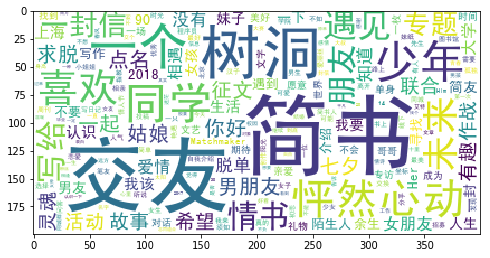

In [55]:
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white',max_font_size=80)
word_frequence = {x[0]:x[1] for x in titles_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud);

### 自定义背景图：Bloody Woods

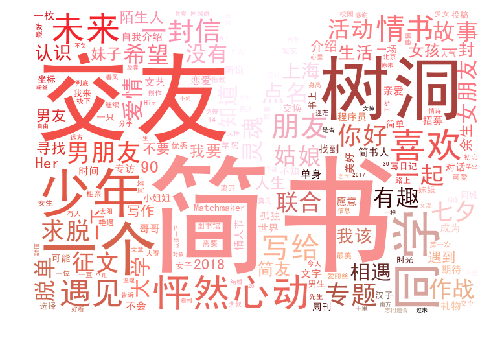

In [60]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('Images/中古民谣乐团Bloody Woods.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in titles_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors));

### 在线词云生成网站：[HTML5 Word Cloud](https://timdream.org/wordcloud/)
[本次实例](https://timdream.org/wordcloud/#base64-list:NTAwCeeugOS5pgoyNTgJ5Lqk5Y+LCjIwMwnmoJHmtJ4KMTkwCeS4gOS4qgoxNTgJ5bCR5bm0CjE0OQnlkIzlraYKMTQ0CeaApueEtuW/g+WKqAoxMTkJ5Zac5qyiCjEwOQnmnKrmnaUKOTEJ6YGH6KeBCjgwCeaDheS5pgo3OAnlhpnnu5kKNzMJ5pyL5Y+LCjYzCeS4gOWwgeS/oQo1OQnkuJPpopgKNTQJ55S35pyL5Y+LCjUzCeaxguiEsQo1MgnkvaDlpb0KNTAJ5LiA6LW3CjQ4CeWnkeWomAo0NwnngrnlkI0KNDcJ5b6B5paHCjQ3CeS4g+WklQo0NAnmlYXkuosKNDMJ5rS75YqoCjQyCeW4jOacmwo0MQnogZTlkIgKNDAJ5L2c5oiYCjQwCeeBtemtggozOQnmnInotqMKMzcJ6ISx5Y2VCjM1CeayoeaciQozNAnnn6XpgZMKMzQJ5aWz5pyL5Y+LCjMzCeeIseaDhQozMgnlpKflraYKMzIJ55u46YGHCjI5CeS4iua1twoyOQnorqTor4YKMjkJ5oiR6K+lCjI3CTkwCjI3CeeUn+a0uwoyNQnkuIDlsIEKMjUJ566A5Y+LCjI0CeaIkeimgQoyNAnkuIDkuIsKMjQJSGVyCjI0CeWls+WtqQoyMwnnlLflj4sKMjMJ5aa55a2QCjIzCTIwMTgKMjMJ5Lq655SfCjIyCeWvu+aJvgoyMgnpmYznlJ/kuroKMjEJ5L2Z55SfCjIxCemBh+WIsAoyMQnlhpnkvZwKMjAJ5LiN6KaBCjIwCeS7i+e7jQoyMAlNYXRjaG1ha2VyCjE5CeaWh+iJugoxOQnkuI3kvJoKMTkJ56S854mpCjE5CeaEv+aEjwoxOAnljZXouqsKMTgJ576O5aW9CjE4CeS4lueVjAoxOAnmloflrZcKMTgJ5a+56K+dCjE4CeS6sueIsQoxNwnmiJDkuLoKMTcJ5om+5YiwCjE2Ceacn+W+hQoxNgnlk6Xlk6UKMTYJ5LiA5Zy6CjE2CeaXtumXtAoxNgnkuJPorr8KMTYJ5LiA5p6aCjE2CeeugOS5puS6ugoxNQnoh6rmiJHku4vnu40KMTUJ5oub5YufCjE1CeaBi+eIsQoxNQnlraTni6wKMTUJ5oOF5Lq66IqCCjE0CeWQrOivtAoxNAnkuI3nn6UKMTQJ5Lqk5o2iCjE0CeWRqOWIigoxNAnlj6/og70KMTQJ56iL5bqP5ZGYCjEzCeWmuee6uAoxMwnnlLfnlJ8KMTMJ5oiR5p2lCjEzCeWdkOaghwoxMwnlsI/lp5Dlp5AKMTMJ5YaZ5pel6K6wCjEzCeeugOWNlQoxMwnkuIDlj6oKMTMJ5rGJ5a2QCjEzCeS5puS4igoxMgnlkIzln44KMTIJ5LyY56eACjEyCeWtpumZogoxMgnlpbPlrZAKMTIJ5pe25YWJCjEyCemAieaLqQoxMgnmipXnqL8KMTEJ5pyA576OCjExCei3r+S4igoxMQnpobvnn6UKMTEJ5pyA5aW9CjExCeeslOWPiwoxMQnlj6/niLEKMTEJ5aWz55SfCjExCTE0CjExCeWbvuS5pummhgoxMQnlsJHlpbMKMTEJ56a75byACjExCeS6uuawlAoxMQnpnIDopoEKMTEJ55u45LqyCjExCeiJs+mBhwoxMQlIaW0KMTAJ55yf55qECjEwCeWFiOeUnwoxMAnniLHkuL3kuJ0KMTAJ5Yid5oGLCjEwCeWPkeeOsAoxMAnkuIDkvY0KMTAJ5YiG5omLCjEwCemYs+WFiQoxMAnmnInkuroKMTAJ57q/5LiLCjEwCemXruetlAoxMAnmjIfmlZkKMTAJ5YyX5LqsCjEwCeWIm+S9nAoxMAnmoKHlm60KMTAJ6Z2S5pilCjEwCee7p+e7rQoxMAnnrKzkuIDmrKEKMTAJ5LuK5aSpCjEwCeS4gOebtAoxMAnlpKfotZsKOQnmlofnq6AKOQnlpKflj5QKOQnkuI3mg7MKOQnmhJ/mg4UKOQnlv4Pph4wKOQnoib7nibkKOQnlt6XkvZwKOQnmhJ/osKIKOQnljYHph4wKOQnkuI3og70KOQnliLDlupUKOQnlsIHkv6EKOQnop4nlvpcKOQnmg4Xor5cKOQnkv6Hmga8KOQnov5zmlrkKOQnov7fojKsKOQnlpbPlj4sKOQnmmK/lkKYKOQnlkYror4kKOQnnu5PlqZoKOQnlpKrpmLMKOQnouqvpq5gKOQnkuqTkuKoKOQnmmKXpo44KOQnlpb3nnIsKOQnnlLflrakKOQnlkIzln47nvqQKOAnkuI3liLAKOAnlkI3lrZcKOAnkuIDnlJ8KOAnorqTor4bkuIDkuIsKOAnmr5XkuJoKOAkzMAo4CeS4jei0nwo4CeWNl+aWuQo4CeeyieS4nQo4CeiHqueUsQo4CeS4gOWumgo4CTIwMTcKOAnlhbblrp4KOAnljp/mnaUKOAnmg7PopoEKOAnmuKnmmpYKOAnog7blm4oKOAkyMAo4CeW/l+WQjOmBk+WQiAo4CeaJvuS4qgo4Cei/h+adpQo4CeWvueixoQo4CeebuOmAogo4CeihqOeZvQo4CeW5s+WHoQo4CeWls+elngo4CeS4gOenjQo4Ceeci+WIsA==)

<img src='Images/Title-wordcloud-3.png'>

### 简书“今日看点”专题热门文章标题词云
另一专题“今日看点”：[简书=鸡汤？爬取简书今日看点：1916篇热门文章可视化](https://zhuanlan.zhihu.com/p/29118954)
<img src='Images/0-8-title-wordcloud-simple.png'>
<img src='Images/0-8-title-wordcloud-bosonNLP-top100words.png'>